In [1]:
!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: matplotlib in /home/marta/.local/lib/python3.8/site-packages (3.5.1)


In [2]:
def read_data_from_file(filename):
    with open(filename, 'r') as file:
        return pd.read_csv(file)

In [16]:
# data = read_data_from_file('simple.csv')
# data = read_data_from_file('pre_versions.csv')

In [37]:
read_data_from_file('../gem5/stats/simple.csv')

,0_config,cpi,cyclesAvgRA,decodedAvgRA,enterRA,icacheStallCycles,insertedAvgRA,ipc,l2Miss,l2MissRA,...,robFull,robFullRA,simTicks,totalDecodedRA,maxAtRobHd,pctRobEmptyRA,freeRegsAvg,fullRegistersEvents,sstHitsPRE,totalExecutedPRE
0,base_rob192_525k_256kB,4.689910,112.541,10.507,95632,524995,10.432,0.213224,198067,12553.0,...,58970.0,1040.0,17075242000,1004763.0,NaN,NaN,NaN,NaN,NaN,NaN
1,base_rob192_1k,0.807424,51.011,NaN,91,84627,39.747,1.238507,296,61.0,...,192.0,NaN,297127000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,base_rob192_10k_128kB,0.823431,48.820,41.236,89,134930,38.876,1.214431,294,61.0,...,192.0,4.0,466457000,3670.0,NaN,NaN,NaN,NaN,NaN,NaN
3,base_rob192_500k_64kB,4.510733,109.587,9.957,64675,362346,9.840,0.221693,131324,3501.0,...,10684.0,176.0,9759213000,643975.0,NaN,NaN,NaN,NaN,NaN,NaN
4,run_rob192_525k_256kB,4.487422,107.091,30.598,88324,1582202,32.157,0.222845,197530,33907.0,...,928.0,NaN,16338016000,2702496.0,490.0,44.988,NaN,NaN,NaN,NaN
5,run_rob192_1k,0.807155,51.741,NaN,81,84717,50.333,1.238919,281,71.0,...,NaN,NaN,297028000,NaN,66.0,59.079,NaN,NaN,NaN,NaN
6,run_rob192_10k_128kB,0.823147,52.062,52.212,80,135029,50.275,1.214850,279,71.0,...,NaN,NaN,466296000,4177.0,66.0,58.872,NaN,NaN,NaN,NaN
7,run_rob192_500k_64kB,4.788096,110.258,33.620,62709,1086212,36.664,0.208851,131188,7727.0,...,73.0,NaN,10359304000,2108246.0,463.0,47.386,NaN,NaN,NaN,NaN
8,pre_rob192_525k_256kB,4.645024,51.389,35.722,1371,533993,0.000,0.215284,198069,5150.0,...,78593.0,70455.0,16911819000,48975.0,768.0,0.000,265.495,10679.0,43247.0,41355.0
9,pre_rob192_1k,0.807424,42.750,NaN,4,84661,0.000,1.238507,295,NaN,...,179.0,171.0,297127000,NaN,NaN,0.000,321.250,NaN,NaN,678940.0


In [17]:
def clean_column_names(data):
    benchmark_data = data.iloc[:, 0]
    benchmark_columns_divided = [line.split('_') for line in benchmark_data]
    print(benchmark_columns_divided)
    def get_entries(which_col):
        entries = [line[which_col] for line in benchmark_columns_divided]
        return entries

    def extract_number(cryptic_name):
        try:
            return int(''.join(filter(str.isdigit, cryptic_name)))
        except ValueError:
            return np.nan
        
    def benchmark_sizes():
        entries = [extract_number(line[1]) for line in benchmark_columns_divided]
        return entries
    
    def benchmark_types():
        entries = [line[1] for line in benchmark_columns_divided]
        return entries
    
    def rob_sizes():
        entries = [extract_number(line[2]) for line in benchmark_columns_divided]
        return entries
    
    def cache_sizes():
        entries = [extract_number(line[3]) for line in benchmark_columns_divided]
        return entries
    
    new_data = data
    new_data['mode'] = pd.Series(get_entries(0))
    new_data['size[k]'] = pd.Series(benchmark_sizes())
    new_data['bench_type'] = pd.Series(benchmark_types())
    new_data['rob_size'] = pd.Series(rob_sizes())
    new_data['l2_cache[kB]'] = pd.Series(cache_sizes())
    
    return new_data
    for col in benchmark_columns_divided:
        print(col)

In [18]:
new_data = clean_column_names(data)

[['base', 'randacc500k', 'rob192', '128kB'], ['base', 'randacc525k', 'rob192', '128kB'], ['base', 'susan', 'rob192', '128kB'], ['pre', 'randacc500knoRRRnoSST', 'rob192', '128kB'], ['pre', 'randacc500knoRRR', 'rob192', '128kB'], ['pre', 'randacc500knoSST', 'rob192', '128kB'], ['pre', 'randacc500k', 'rob192', '128kB'], ['pre', 'randacc525knoRRRnoSST', 'rob192', '128kB'], ['pre', 'randacc525knoRRR', 'rob192', '128kB'], ['pre', 'randacc525knoSST', 'rob192', '128kB'], ['pre', 'randacc525k', 'rob192', '128kB'], ['pre', 'susannoRRRnoSST', 'rob192', '128kB'], ['pre', 'susannoRRR', 'rob192', '128kB'], ['pre', 'susannoSST', 'rob192', '128kB'], ['pre', 'susan', 'rob192', '128kB'], ['run', 'randacc500k', 'rob192', '128kB'], ['run', 'randacc525k', 'rob192', '128kB'], ['run', 'susan', 'rob192', '128kB']]


In [19]:
new_data

,0_config,simTicks,iqFullEvents,cpi,enterRA,maxAtRobHd,totalDecodedRA,l2Miss,l2MissRA,fullRegistersEvents,...,prdqEntriesRecycled,preRegsFreed,robFullRA,sstHitsPRE,totalExecutedPRE,mode,size[k],bench_type,rob_size,l2_cache[kB]
0,base_randacc500k_rob192_128kB,7685084000,43266,3.552064,40542,NaN,408955,82886,2811,NaN,...,NaN,NaN,155.0,NaN,NaN,base,500.0,randacc500k,192,128
1,base_randacc525k_rob192_128kB,22197601000,92967,6.096822,151484,NaN,1530044,311421,17634,NaN,...,NaN,NaN,819.0,NaN,NaN,base,525.0,randacc525k,192,128
2,base_susan_rob192_128kB,36462906000,6520,0.964240,20364,NaN,2539418,50123,6734,NaN,...,NaN,NaN,15806.0,NaN,NaN,base,NaN,susan,192,128
3,pre_randacc500knoRRRnoSST_rob192_128kB,7687217000,43344,3.553049,159,768.0,4398,82884,4,NaN,...,NaN,NaN,5574.0,NaN,4066.0,pre,500.0,randacc500knoRRRnoSST,192,128
4,pre_randacc500knoRRR_rob192_128kB,7687804000,45272,3.553321,133,768.0,4852,82892,4,212.0,...,NaN,NaN,3713.0,3267.0,3361.0,pre,500.0,randacc500knoRRR,192,128
5,pre_randacc500knoSST_rob192_128kB,7687217000,43344,3.553049,159,768.0,4398,82884,4,NaN,...,1080.0,419.0,5574.0,NaN,4066.0,pre,500.0,randacc500knoSST,192,128
6,pre_randacc500k_rob192_128kB,7684823000,45232,3.551943,140,768.0,4986,82888,4,123.0,...,1019.0,488.0,4090.0,3370.0,3442.0,pre,500.0,randacc500k,192,128
7,pre_randacc525knoRRRnoSST_rob192_128kB,21977946000,93473,6.036491,1086,768.0,33541,311423,162,NaN,...,NaN,NaN,65777.0,NaN,29717.0,pre,525.0,randacc525knoRRRnoSST,192,128
8,pre_randacc525knoRRR_rob192_128kB,21993360000,93541,6.040725,1069,768.0,35555,311423,138,NaN,...,NaN,NaN,62226.0,32413.0,30318.0,pre,525.0,randacc525knoRRR,192,128
9,pre_randacc525knoSST_rob192_128kB,21977946000,93473,6.036491,1086,768.0,33541,311423,162,NaN,...,11813.0,7194.0,65777.0,NaN,29717.0,pre,525.0,randacc525knoSST,192,128


array(['randacc500k', 'randacc525k', 'susan', 'randacc500knoRRRnoSST',
       'randacc500knoRRR', 'randacc500knoSST', 'randacc500k',
       'randacc525knoRRRnoSST', 'randacc525knoRRR', 'randacc525knoSST',
       'randacc525k', 'susannoRRRnoSST', 'susannoRRR', 'susannoSST',
       'susan', 'randacc500k', 'randacc525k', 'susan'], dtype=object)

In [34]:
# analyze_param(new_data, [], 'cpi', )


Cannot find a row with benchmark: susannoRRR rob: 192 l2: 128 mode run
Cannot find a row with benchmark: susannoRRRnoSST rob: 192 l2: 128 mode run
Cannot find a row with benchmark: susannoSST rob: 192 l2: 128 mode run
Cannot find a row with benchmark: susannoRRR rob: 192 l2: 128 mode base
Cannot find a row with benchmark: susannoRRRnoSST rob: 192 l2: 128 mode base
Cannot find a row with benchmark: susannoSST rob: 192 l2: 128 mode base


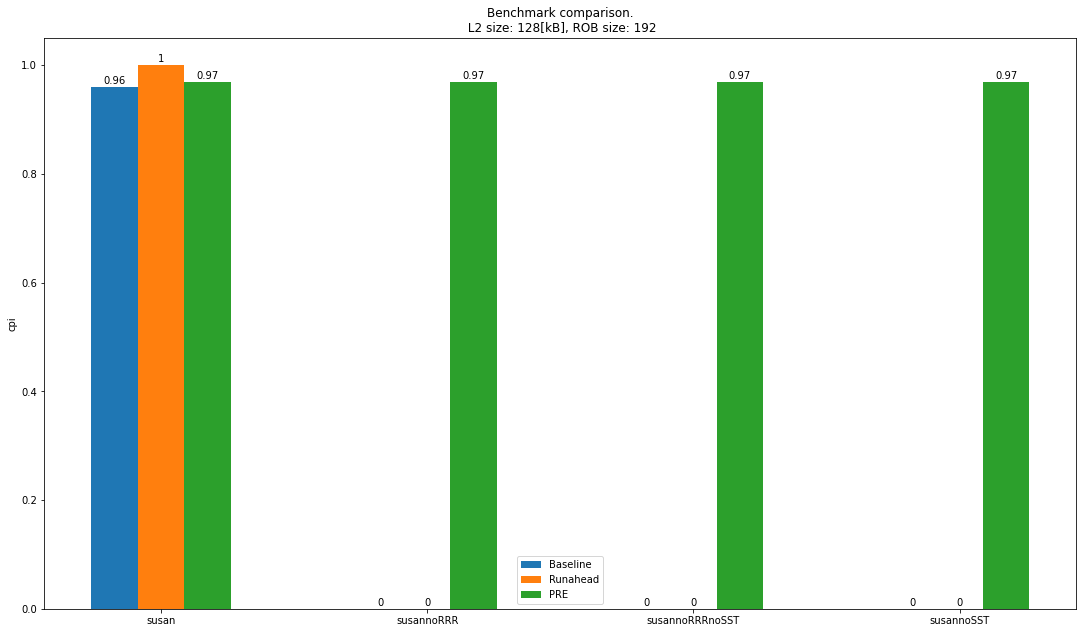

In [36]:
def compare_benchmarks(df, benchmarks, statistic, robsize=128, cachesize=64):
    n_benches = len(benchmarks)

    def find_value(bench_name, statistic, robsize, cachesize, mode):
        good_row = df.loc[(df['bench_type'] == bench_name) & 
                              (df['rob_size'] == robsize) & 
                              (df['l2_cache[kB]'] == cachesize) & 
                              (df['mode'] == mode)]
        
        if len(good_row[statistic]) == 0:
            print("Cannot find a row with benchmark: " + bench_name +\
                            " rob: " + str(robsize) + " l2: " + str(cachesize) +\
                            " mode " + mode)
        try:
            return good_row[statistic].values[0]
        except:
            return 0
                              
    
    def round2(value):
        return round(float(value), 2)
    
    def get_data_for_mode(mode):
        return np.array([round2(find_value(name, statistic, robsize, cachesize, mode)) for name in benchmarks])
        
    pre_scores = get_data_for_mode('pre')
    run_scores = get_data_for_mode('run')
    base_scores = get_data_for_mode('base')

    x = np.arange(len(benchmarks))  # the label locations
    width = 0.35  # the width of the bars
    bottom = 0
    
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    
    rects1 = ax.bar(x - width/2, base_scores - bottom, width/2, bottom=bottom, label='Baseline')
    rects2 = ax.bar(x,  run_scores - bottom, width/2, bottom=bottom, label='Runahead')
    rects3 = ax.bar(x + width/2, pre_scores - bottom, width/2, bottom=bottom, label='PRE')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(statistic)
    ax.set_title("Benchmark comparison.\n L2 size: {}[kB], ROB size: {}".format(cachesize, robsize))
    ax.set_xticks(x, benchmarks)
    ax.legend()

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)
    ax.bar_label(rects3, padding=1)

    plt.show()
    
# compare_benchmarks(new_data, ['randacc500k', 'randacc600k', 'susan', 'randacc500k'], 'cpi')
np.array(new_data['bench_type'])
compare_benchmarks(new_data, ['susan', 'susannoRRR', 'susannoRRRnoSST', 'susannoSST'], 'cpi', \
                   robsize=192, cachesize=128)

In [32]:
def analyze_param(df, benchmark, statistic, robsizes=[128], cachesizes=[64]):
    def find_value(bench_name, statistic, robsize, cachesize, mode):
        good_row = df.loc[(df['bench_type'] == bench_name) & 
                          (df['rob_size'] == robsize) & 
                          (df['l2_cache[kB]'] == cachesize) & 
                          (df['mode'] == mode)]

        if len(good_row[statistic]) == 0:
            raise Exception("Cannot find a row with benchmark: " + bench_name +\
                            " rob: " + str(robsize) + " l2: " + str(cachesize) +\
                            " mode " + mode)
        try:
            return good_row[statistic].values[0]
        except:
            return 0
    
    def round2(value):
        return round(float(value), 2)
    
    def get_cache_data_for_mode(mode, robsize, cachesizes):
        return np.array([round2(find_value(benchmark, statistic, robsize, c, mode)) for c in cachesizes])
    def get_rob_data_for_mode(mode, robsizes, cachesize):
        return np.array([round2(find_value(benchmark, statistic, r, cachesize, mode)) for r in robsizes])
    
    if len(robsizes) == 1:
        # analyzing cache sizes
        analyze_caches = True
        robsize = robsizes[0]
        pre_scores = get_cache_data_for_mode('pre', robsize, cachesizes)
        run_scores = get_cache_data_for_mode('run', robsize, cachesizes)
        base_scores = get_cache_data_for_mode('base', robsize, cachesizes)
    else:
        assert len(cachesizes) == 1
        analyze_caches = False
        cachesize = cachesizes[0]
        pre_scores = get_rob_data_for_mode('pre', robsizes, cachesize)
        run_scores = get_rob_data_for_mode('run', robsizes, cachesize)
        base_scores = get_rob_data_for_mode('base', robsizes, cachesize)
    

    print(pre_scores)
    print(run_scores)
    print(base_scores)
        
    x = np.arange(len(pre_scores))  # the label locations
    width = 0.35  # the width of the bars
    bottom = 3
    
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    
    rects1 = ax.bar(x - width/2, pre_scores - bottom, width/2, bottom=bottom, label='PRE')
    rects2 = ax.bar(x, run_scores - bottom, width/2, bottom=bottom, label='Baseline')
    rects3 = ax.bar(x + width/2, base_scores - bottom, width/2, bottom=bottom, label='Runahead')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(statistic)
    if analyze_caches:
        ax.set_title("L2 cache size[kB] comparison for benchmark {}.\n ROB size: {}".format(benchmark, robsize))    
        ax.set_xticks(x, cachesizes)
    else:
        ax.set_title("ROB size comparison for benchmark {}.\n L2 cache size [kB]: {}".format(benchmark, cachesize))
        ax.set_xticks(x, robsizes)
        
    ax.legend()

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)
    ax.bar_label(rects3, padding=1)

    plt.show()
    

In [42]:
# doesn't work because some data is empty
analyze_param(new_data, 'randacc500k', 'cpi', robsizes=[128, 192], cachesizes=[256])

Exception: Cannot find a row with benchmark: randacc500k rob: 128 l2: 256 mode pre

[4.51 3.59]
[4.87 3.77]
[4.51 3.55]


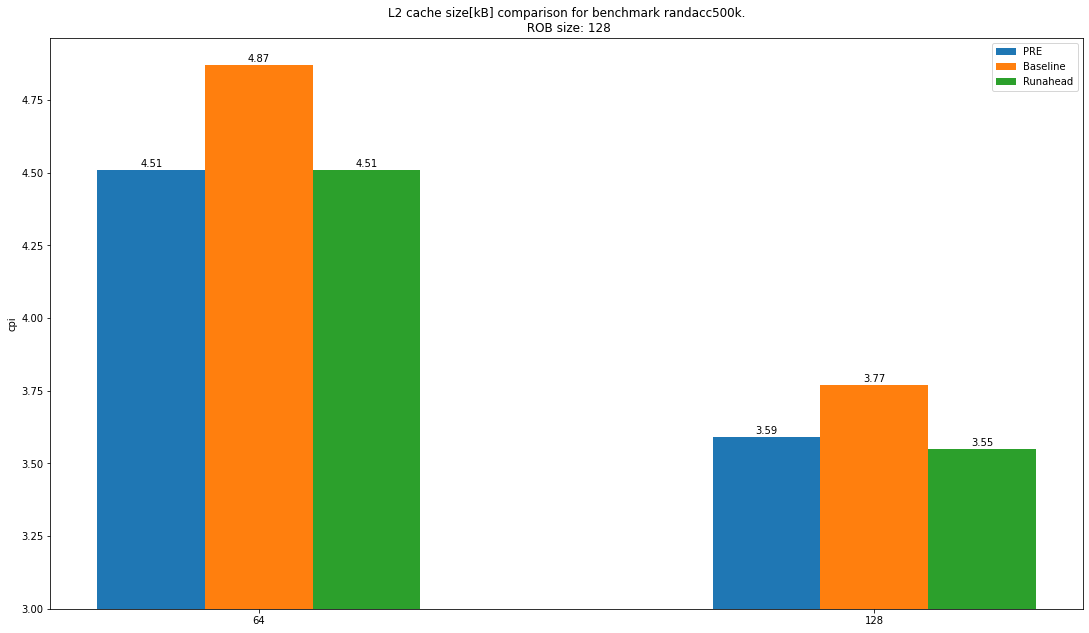

In [46]:
#works just fine
analyze_param(new_data, 'randacc500k', 'cpi', robsizes=[128], cachesizes=[64,128])